In [1]:
#Them thu vien
import cv2
print(cv2.__version__)

4.8.0


In [2]:
#Ket noi drive
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/MyDrive/ThiGiacMayTinh/HinhMau

Mounted at /content/drive/
/content/drive/MyDrive/ThiGiacMayTinh/HinhMau


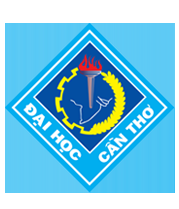

-1

In [3]:
#Cau1
from google.colab.patches import cv2_imshow
img = cv2.imread('logo.png')  #Doc anh
cv2_imshow(img)               #hien thi hinh anh
cv2.waitKey(0)

In [4]:
#Cau 2
(h, w, d) = img.shape     #Lay chieu cao, chieu rong va chieu sau
print('width={0} ,height={1} ,depth={2}'.format(w,h,d))
(B, G, R) = img[80,80]   #Lay mau tai diem anh duoc xac dinh
print('R={0} ,G={1} ,B={2}'.format(R,G,B))

width=179 ,height=209 ,depth=3
R=3 ,G=78 ,B=162


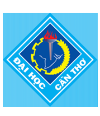

In [5]:
#Cau 3
r = 100/w
dim = (100, int(h*r))
resized = cv2.resize(img,dim)
cv2_imshow(resized)

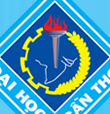

In [6]:
#----------cat anh
roi = img[40:154,35:145] #[Y,X]
cv2_imshow(roi)

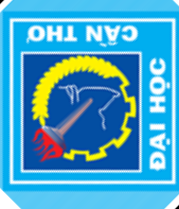

In [7]:
#---------Xoay anh
center = (w//2, h//2)

'''
getRotationMatrix2D() function is used to make the transformation matrix M which will be used for rotating a image.
cv2.getRotationMatrix2D(center, angle, scale)
'''
M = cv2.getRotationMatrix2D(center, 135,1.5)

'''

'''
rotated = cv2.warpAffine(img, M ,(w,h))
cv2_imshow(rotated)

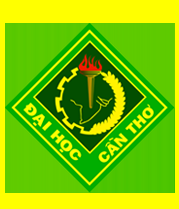

True

In [8]:
#------- tat kenh mau xanh duong
TatKenhMauXanh = img
TatKenhMauXanh[:,:,0]=0
cv2_imshow(TatKenhMauXanh)

#------Luu anh

cv2.imwrite('AnhMoi.jpg', TatKenhMauXanh) #Luu hinh anh tai thu muc HinhMau


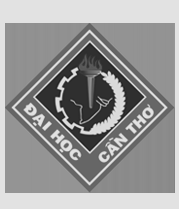

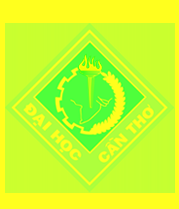

Do cao cua anh:  209
Do rong cua anh:  179


In [9]:
# Cau 4
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #Chuyen mau muc xam
cv2_imshow(imgGray)
imgHSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
cv2_imshow(imgHSV)
print('Do cao cua anh: ',img.shape[0])
print('Do rong cua anh: ',img.shape[1])

Do cao cua anh:  209
Do rong cua anh:  179


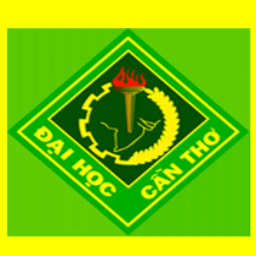

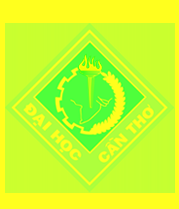

In [10]:
#Cau 5
print('Do cao cua anh: ',img.shape[0])
print('Do rong cua anh: ',img.shape[1])
#2b
I2 = cv2.resize(img, (256,256))
cv2_imshow(I2)
#2c
Ihsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
cv2_imshow(Ihsv)

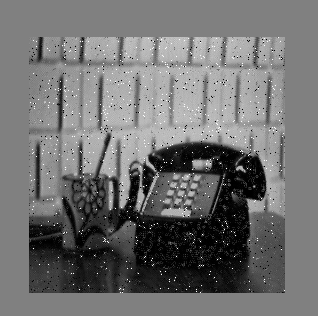

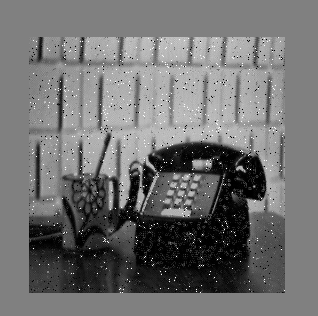

0


In [11]:
import numpy as np
# cau 6
img2 = cv2.imread('Salt.png')

#3a
cv2_imshow(img2)
#3b
img2HSV = cv2.cvtColor(img2, cv2.COLOR_BGR2HSV)
# cv2_imshow(img2HSV[:,:,0])
# cv2_imshow(img2HSV[:,:,1])
cv2_imshow(img2HSV[:,:,2])
cv2_imshow
#Muc sang min
print(np.min(img2HSV[:,:,1]))

#-----------------------------------------
#kernel
BoxFilterKernel = np.array([[1/9,1/9,1/9],
                           [1/9,1/9,1/9],
                           [1/9,1/9,1/9]])
#Tich chap
anhKQ = cv2.filter2D(img2, -1, BoxFilterKernel)
#cv2_imshow(anhKQ)

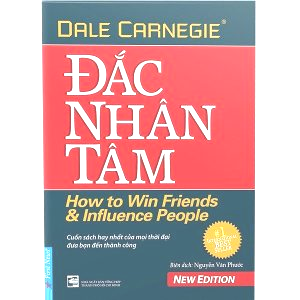

In [12]:
#Cau 7
import sys

#Ham tang do sang
def change_brightness(img, alpha, beta):
  #cast pixel values to int
  '''
    - numpy.asanyarray()function is used when we want to convert input to an array but
    it pass ndarray subclasses through. Input can be scalars, lists, lists of tuples, tuples,
    tuples of tuples, tuples of lists and ndarrays.
    - Syntax : numpy.asanyarray(arr, dtype=None, order=None)
  '''
  img_new = np.asanyarray(alpha*img + beta, dtype=int)
  img_new[img_new > 255] = 255 #Neu lon hon 255 thi dat ve 255
  img_new[img_new < 0] = 0  #Neu nho hon 0 thi dat ve 0
  return img_new

if __name__=="__main__":
  alpha = 1.0
  beta = 70
  img3 = cv2.imread('DNT.jpg')
  img_new =  change_brightness(img3, alpha, beta)
  cv2_imshow(img_new)



input:


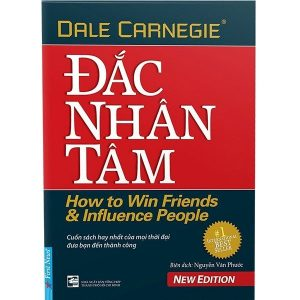

output:


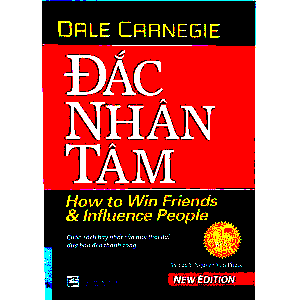

In [13]:
# Cau8
import os
import sys

#anh nhi phan
def conver_to_binary(img_grayscale,thresh ):
  thresh, img_binary = cv2.threshold(img_grayscale, thresh, maxval=255, type=cv2.THRESH_BINARY)
  return img_binary

if __name__=="__main__":
  input_image = cv2.imread('DNT.jpg')
  print('input:')
  cv2_imshow(input_image)
  print('output:')
  img_binary = conver_to_binary(input_image, 150)
  cv2_imshow(img_binary)

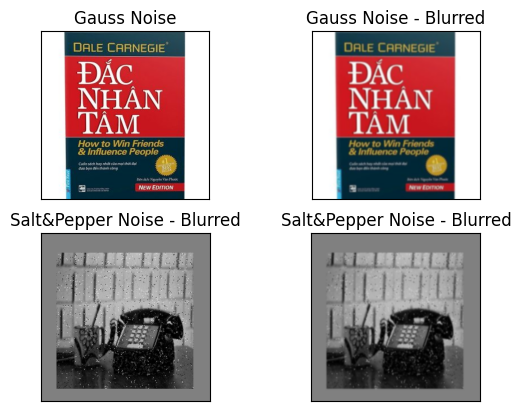

In [14]:
#cau 10
from matplotlib import pyplot as plt
#tai hinh anh
img = cv2.imread('DNT.jpg')
img2 = cv2.imread('Salt.png')
blur = cv2.GaussianBlur(img, (5,5), 0)
blur2 = cv2.GaussianBlur(img2, (5,5), 0)

#Convert color from bgr (OpenCV default) to rgb
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
blur_rgb = cv2.cvtColor(blur, cv2.COLOR_BGR2RGB)
img_rgb2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
blur_rgb2 = cv2.cvtColor(blur2, cv2.COLOR_BGR2RGB)

#Hien thi
plt.subplot(221), plt.imshow(img_rgb), plt.title('Gauss Noise')
plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(blur_rgb), plt.title('Gauss Noise - Blurred')
plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(img_rgb2), plt.title('Salt&Pepper Noise - Blurred')
plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.imshow(blur_rgb2), plt.title('Salt&Pepper Noise - Blurred')
plt.xticks([]), plt.yticks([])
plt.show()


input:


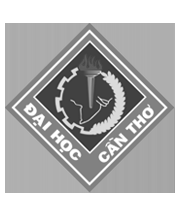

Anh nhi phan:


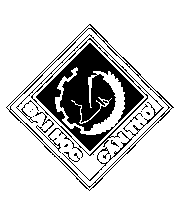

Anh am ban:


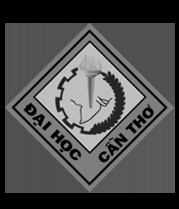

In [15]:
#Am ban
def conver_to_binary_and_negative(ImagePath):
  #Doc anh & dong tho9i chuyen anh ,mau sang anh muc xam
  image = cv2.imread(ImagePath, 0)

  #Chuyen doi anh sang anh nhi phan
  _, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

  #chuyen doi anh am ban
  negative_image = 255 - image

  return binary_image, negative_image #Tra ve 2 anh

DuongDan = "logo.png"
NhiPhan, AmBan = conver_to_binary_and_negative(DuongDan)

#show
print('input:')
cv2_imshow(cv2.imread(DuongDan,0))
print('Anh nhi phan:')
cv2_imshow(NhiPhan)
print('Anh am ban:')
cv2_imshow(AmBan)


input:


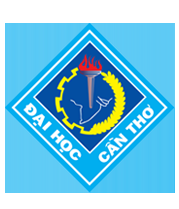

output Tang:


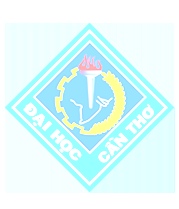

output Giam:


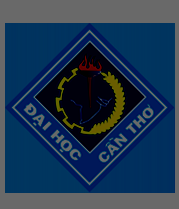

In [16]:
# >>>>>>> Tang giam do sang vang code <<<<<<<<

TangDoSang = cv2.imread('logo.png')
GiamDoSang = cv2.imread('logo.png')

print("input:")
cv2_imshow(TangDoSang)

#muc sang can tang /giam
mucTang = 150

#Lay kich thuoc anh
h,w,c = TangDoSang.shape

#Chay theo chieu cao
for i in range(h):
  #chay theo chieu rong
  for j in range(w):
    #chay theo chieu sau
    for k in range(c):
      ##Tang do sang
      TangDoSang[i,j,k] = np.clip(TangDoSang[i,j,k]+ mucTang,0,255)
      ##giam do sang
      GiamDoSang[i,j,k] = np.clip(GiamDoSang[i,j,k]- mucTang,0,255)
#show
print("output Tang:")
cv2_imshow(TangDoSang)
print("output Giam:")
cv2_imshow(GiamDoSang)


Input image:


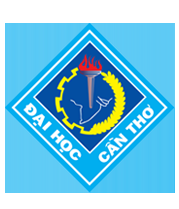

Ap dung bo loc cua de bai:


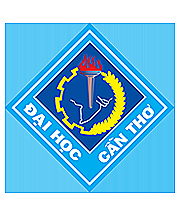

Dao ham bac 1:


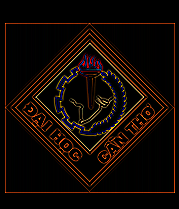

Dao ham bac 2:


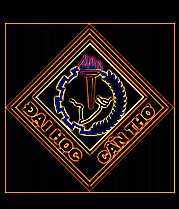

In [17]:
#>>>>>>>>>> Tich chap ma tran <<<<<<<
img = cv2.imread('logo.png')
#Bo loc
boloc = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

#thuc hien tich chap
anhKQ1 = cv2.filter2D(img, -1, boloc)

print("Input image:")
cv2_imshow(img)
print("Ap dung bo loc cua de bai:")
cv2_imshow(anhKQ1)

DHbac1 = np.array([
    [0,1,0],
    [1,-4,1],
    [0,1,0]
])
anhKQ2 = cv2.filter2D(img, -1, DHbac1)
print("Dao ham bac 1:")
cv2_imshow(anhKQ2)

DHbac2 = np.array([
    [1,1,1],
    [1,-8,1],
    [1,1,1]
])
anhKQ3 = cv2.filter2D(img, -1, DHbac2)
print("Dao ham bac 2:")
cv2_imshow(anhKQ3)

(Text(0.5, 1.0, 'sobel y'), ([], []), ([], []))

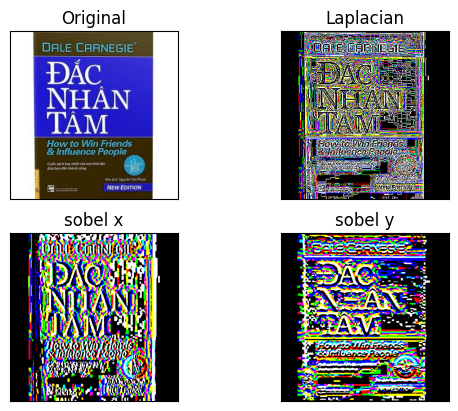

In [19]:
# Cau 11:
img = cv2.imread('DNT.jpg')
laplacian = cv2.Laplacian(img, cv2.CV_64F)
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)
plt.subplot(221), plt.imshow(img, cmap='gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(sobelx, cmap='gray')
plt.title('sobel x'), plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.imshow(sobely, cmap='gray')
plt.title('sobel y'), plt.xticks([]), plt.yticks([])
